In [1]:
from edahelper import *
wsb = pd.read_pickle('../Data/wsb_cleaned.pkl')

In [15]:
# Only keep posts where the author data is there.
wsb = wsb.loc[wsb.author != "None"]

In [35]:
author_posting = dict(wsb.author.value_counts())
author_df = (wsb.groupby('author')[['ups']] .agg('sum' ))
wsb['author_total_upvotes'] = wsb.author.apply( lambda x : author_df.loc[x]['ups'])

In [28]:
wsb['author_proliferacy'] = wsb.author.apply( lambda x : author_posting[x])

In [52]:
author_df = wsb[['author', 'ups']].groupby('author').agg( [lambda x: tuple(x), 'count', 'sum', 'mean'])

In [65]:
pd.set_option('display.max_colwidth', None)
author_df[author_df[('ups', 'mean')] > 200].sort_values(by = ('ups', 'count'), ascending = False)['ups']['<lambda_0>'].head(20)

author
OPINION_IS_UNPOPULAR    (1212, 2883, 3221, 36695, 9583, 15699, 8524, 50650, 28009, 19725, 7565, 30641, 18969, 553, 6618, 29905, 2344, 1555, 3665, 1939, 2132, 2305, 18663, 3473, 1405, 185, 1461, 280, 1167, 1239, 1430, 5525, 1326, 1881, 1057, 1425, 3737, 1391, 992, 14804, 1073, 25212, 4207, 1123, 6059, 30214, 1432, 3186, 26793, 32074, 3726, 3252, 12841, 20059, 1907, 44144, 2209, 1553, 1708, 0, 1501, 1542, 2570, 572, 0, 24569, 1397, 1295, 1900, 2175, 957, 29974, 1814, 2276, 47735, 382, 48293, 2407, 1617, 2115, 14667, 661, 28399, 1740, 2622, 631, 388, 29008, 1409, 7916, 2010, 1722, 392, 289, 29420, 1700, 1316, 269, 211, 28431, ...)
dhiral1994                                                                                                                                 (1, 38, 197, 6662, 30232, 484, 230, 230, 1204, 0, 187, 533, 154, 88, 0, 1, 228, 1, 302, 2, 1, 681, 1331, 37, 191, 39, 1, 53, 1, 390, 1, 14, 442, 543, 122, 647, 467, 1487, 7, 588, 4000, 10073, 1306, 994, 415, 5445, 5382

author
OPINION_IS_UNPOPULAR    AxesSubplot(0.125,0.125;0.775x0.755)
PubertEHumphrey         AxesSubplot(0.125,0.125;0.775x0.755)
dhiral1994              AxesSubplot(0.125,0.125;0.775x0.755)
pdwp90                  AxesSubplot(0.125,0.125;0.775x0.755)
Name: <lambda_0>, dtype: object

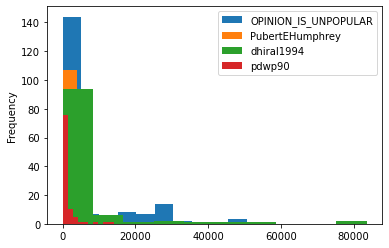

In [76]:
author_df[author_df[('ups', 'mean')] > 200].sort_values(by = ('ups', 'count'), ascending = False)['ups']['<lambda_0>'].head(4).explode().groupby('author').plot(kind = 'hist', legend = True)

They look kind of power law ish

So, maybe a reasonable model is to assume that each posts upvotes comes from a power law distribution, with parameter that depends on the author. We can use empirical bayes to estimate the parameters for the authors.